## Cargar los datos

In [79]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

input_file_smart = '../simulation_results/smart_matrix.json'
input_file_standard = '../simulation_results/standard_matrix.json'

with open(input_file_smart, 'r') as f:
    data_smart = json.load(f)
with open(input_file_standard, 'r') as f:
    data_standard = json.load(f)
    
df_smart = []
for i in data_smart: 
    i["walkers_semaphone_delay"] = i['walkers_semaphore_delay']
    df_cars = pd.DataFrame({"cars_delay": i['cars_delay'], "cars_semaphone_delay": i['cars_semaphore_delay']})
    df_walkers = pd.DataFrame({"walkers_delay": i['walkers_delay'], "walkers_semaphone_delay": i['walkers_semaphone_delay']})
    df_smart.append([df_cars, df_walkers])

df_standard = []
for i in data_standard: 
    i["walkers_semaphone_delay"] = i['walkers_semaphore_delay']
    df_cars = pd.DataFrame({"cars_delay": i['cars_delay'], "cars_semaphone_delay": i['cars_semaphore_delay']})
    df_walkers = pd.DataFrame({"walkers_delay": i['walkers_delay'], "walkers_semaphone_delay": i['walkers_semaphone_delay']})
    df_standard.append([df_cars, df_walkers])

In [11]:
pd.set_option('display.float_format', '{:.3f}'.format)
for i in df_smart:
    print(i[0].describe())

       cars_delay  cars_semaphone_delay
count     339.000               339.000
mean      711.198               423.584
std       709.072               430.276
min         1.000                 0.000
25%       253.000               139.000
50%       536.000               316.000
75%       883.500               545.500
max      6308.000              3741.000
       cars_delay  cars_semaphone_delay
count     313.000               313.000
mean      740.652               444.259
std       649.189               399.040
min         3.000                 0.000
25%       274.000               158.000
50%       578.000               343.000
75%      1033.000               611.000
max      5573.000              3442.000
       cars_delay  cars_semaphone_delay
count     349.000               349.000
mean      762.287               458.788
std       700.777               432.340
min         5.000                 0.000
25%       256.000               151.000
50%       533.000               323.000


In [12]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_walkers.describe()

,walkers_delay,walkers_semaphore_delay
count,1011.000,1011.000
mean,299.290,60.398
std,221.095,48.095
min,1.000,0.000
25%,144.000,27.000
50%,243.000,48.000
75%,405.000,83.000
max,2123.000,464.000


## Mostrar histograma con los datos

In [ ]:
for i in range(np.max([len(df_smart), len(df_standard)])):
    df_cars_smart = df_smart[i][0]
    df_cars_standard = df_standard[i][0]
    columns_to_plot = [col for col in df_cars.columns]
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot)*3))

    for i, col in enumerate(columns_to_plot):
        # df_cars_smart[col].hist(bins=30, ax=axes[i])
        # df_cars_standard[col].hist(bins=30, ax=axes[i], edgecolor='black')
        axes[i].hist([df_cars_smart[col], df_cars_standard[col]], bins=30, edgecolor='black')
        axes[i].legend(["smart", "standard"])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Time Frecuency')

    plt.tight_layout()

    plt.show()


plt.show()

In [ ]:
for i in range(np.max([len(df_smart), len(df_standard)])):
    df_walkers_smart = df_smart[i][1]
    df_walkers_standard = df_standard[i][1]
    columns_to_plot = [col for col in df_walkers.columns]
    fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot)*3))

    for i, col in enumerate(columns_to_plot):
        # walkers_smart[col].hist(bins=30, ax=axes[i])
        # walkers_standard[col].hist(bins=30, ax=axes[i], edgecolor='black')
        axes[i].hist([df_walkers_smart[col], df_walkers_standard[col]], bins=30, edgecolor='black')
        axes[i].legend(["smart", "standard"])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Time Frecuency')

    plt.tight_layout()

    plt.show()


plt.show()

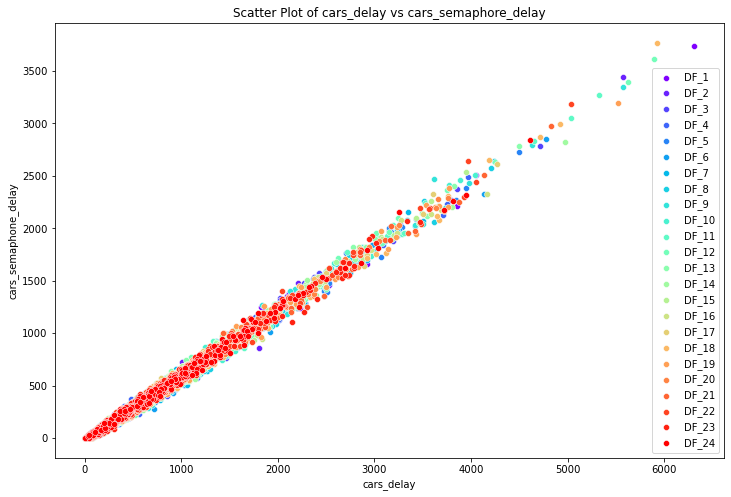

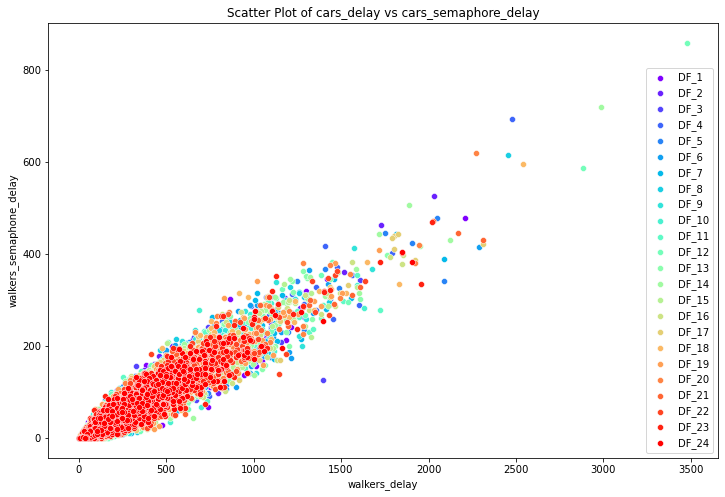

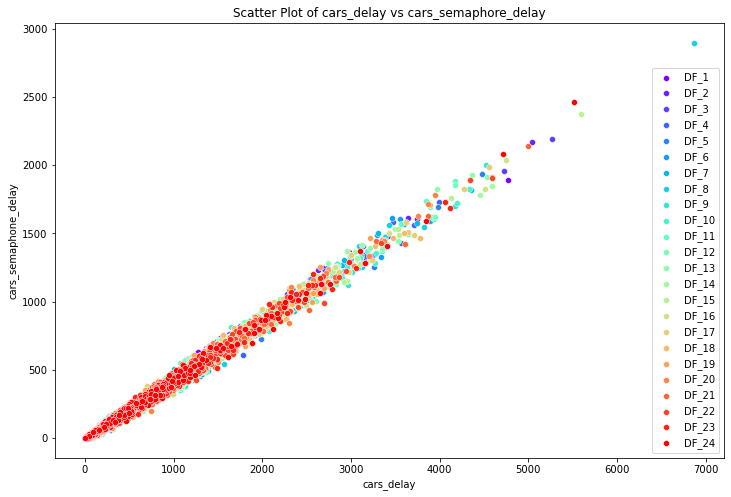

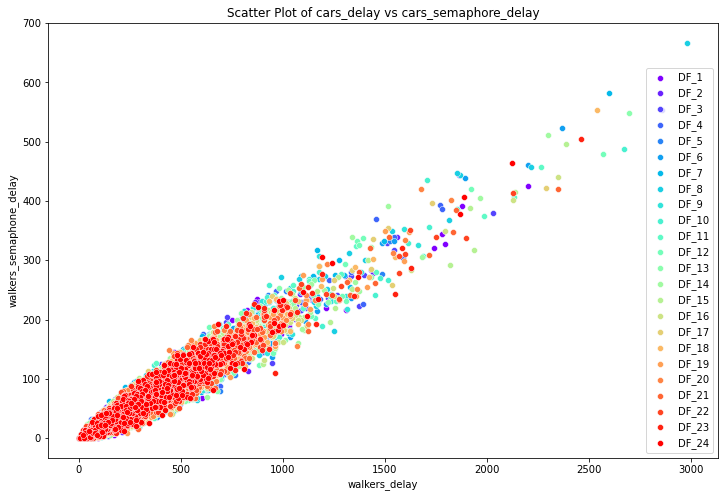

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes múltiples DataFrames en una lista llamada df_list
def draw_scatterplot(df_list, index):
    # Determina el número máximo de series para usar colores diferentes
    max_series = len(df_list)
    colors = plt.cm.rainbow(np.linspace(0, 1, max_series))

    plt.figure(figsize=(12, 8))
    for i, df in enumerate(df_list):
        if index == 0:
            sns.scatterplot(x='cars_delay', y='cars_semaphone_delay', data=df[index], label=f'DF_{i+1}', color=colors[i])
        if index == 1:
            sns.scatterplot(x='walkers_delay', y='walkers_semaphone_delay', data=df[index], label=f'DF_{i+1}', color=colors[i])
            # print(df)

    plt.title('Scatter Plot of cars_delay vs cars_semaphore_delay')
    if index == 0:
        plt.xlabel('cars_delay')
        plt.ylabel('cars_semaphone_delay')
    else:
        plt.xlabel('walkers_delay')
        plt.ylabel('walkers_semaphone_delay')

    # Agrega leyenda
    plt.legend()

    plt.show()

draw_scatterplot(df_smart, 0)
draw_scatterplot(df_smart, 1)
draw_scatterplot(df_standard, 0)
draw_scatterplot(df_standard, 1)

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Análisis de normalidad

In [ ]:
for x in df_cars.columns:
    print(f"El kurtosis de {x} es {df_cars[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df_cars[x].skew()}")
print()
for x in df_walkers.columns:
    print(f"El kurtosis de {x} es {df_walkers[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df_walkers[x].skew()}")

El kurtosis de cars_delay es 9.941143795818949
La Asimetría de cars_delay es 2.5222197882948656
El kurtosis de cars_semaphone_delay es 9.705789499444355
La Asimetría de cars_semaphone_delay es 2.497374354493005

El kurtosis de walkers_delay es nan
La Asimetría de walkers_delay es nan
El kurtosis de walkers_semaphore_delay es nan
La Asimetría de walkers_semaphore_delay es nan


### Test de Normalidad

In [ ]:
from scipy.stats import kstest, shapiro


for x in df_cars.columns:
    test = df_cars[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

for x in df_walkers.columns:
    test = df_walkers[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

cars_delay
D = 0.9999997133484281
p-value = 0.0

cars_semaphone_delay
D = 0.9786501019683699
p-value = 1.7402454649180068e-167



ValueError: a must be greater than 0 unless no samples are taken

## Matriz de Correlación

Mediante la matriz de correlación veremos la relación entre las variables y nos dará una idea de las variables a seleccionar

In [42]:
import numpy as np
from scipy import stats
from statsmodels.formula.api import glm


# Simulaciones para cada grupo
simulations_per_group = 24

values = [[0 for _ in range(len(df_smart))] for _ in range(len(df_standard))]

for i in range(len(df_smart)):
    temp = []
    for j in range(len(df_standard)):
        sm = df_smart[i]
        st = df_standard[j]
        # Convertir las listas de simulaciones a arrays NumPy
        grupo1_array = sm[0]['cars_delay'].values
        grupo2_array = st[0]['cars_delay'].values

        # Realizar el test post-hoc si es necesario
        post_hoc = stats.tukey_hsd(grupo1_array.flatten(), grupo2_array.flatten())
        p_value = post_hoc.pvalue
        values[i][j] = p_value[0][1]
    values.append(temp)

0 0 0.11926703745702183$ 0 1 0.7425900817640156$ 0 2 0.8432956093114503$ 0 3 0.7186361154263902$ 0 4 0.3366786672168163$ 0 5 0.4970972129136614$ 0 6 0.862726193000835$ 0 7 0.8305977767445262$ 0 8 0.967995853433819$ 0 9 0.7204795906310169$ 0 10 0.37047228552808564$ 0 11 0.9616494837670131$ 0 12 0.6208018425610462$ 0 13 0.9179788965265655$ 0 14 0.8255446029618292$ 0 15 0.9382383806471624$ 0 16 0.8342346476152992$ 0 17 0.726891054211316$ 0 18 0.41060141928894933$ 0 19 0.9507264190097304$ 0 20 0.780004821930086$ 0 21 0.890116063265015$ 0 22 0.704933150656344$ 0 23 0.4987936694422933$ 
1 0 0.29672507684373883$ 1 1 0.8254105244177864$ 1 2 0.7335035306163024$ 1 3 0.3428666942278853$ 1 4 0.11716281322688271$ 1 5 0.8730058596352493$ 1 6 0.7113657479942175$ 1 7 0.44406370920909155$ 1 8 0.5540118417878899$ 1 9 0.366999307644323$ 1 10 0.14172217842085144$ 1 11 0.5281211853794632$ 1 12 0.29808402612997265$ 1 13 0.6550989042094262$ 1 14 0.7623786397383058$ 1 15 0.638545099141953$ 1 16 0.748391183594

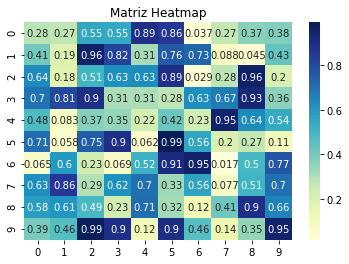

In [46]:
import seaborn as sns
import pandas as pd
import numpy as np

# Crea un DataFrame con la matriz
df = pd.DataFrame(np.random.rand(10, 10))

# Usa seaborn para crear una heatmap
sns.heatmap(df, annot=True, cmap="YlGnBu")
plt.title('Matriz Heatmap')
plt.show()

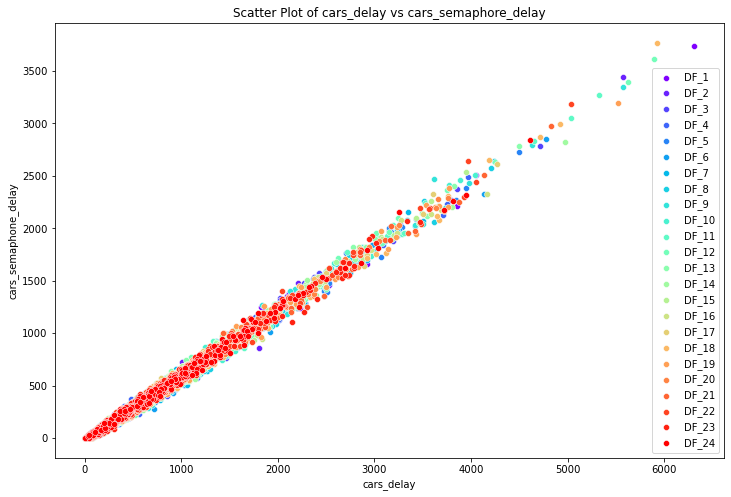

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cars, x='cars_delay', y='cars_semaphone_delay')
plt.title('Box Plots of cars_delay and cars_semaphore_delay')
plt.xticks(rotation=45)
plt.show()

DataFrame 1:


AttributeError: 'list' object has no attribute 'columns'

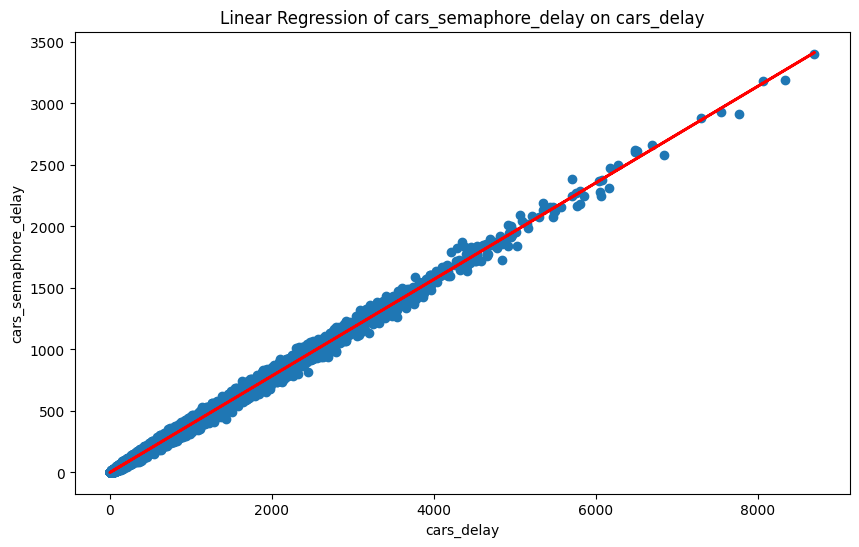

In [ ]:
# 7. Regression analysis
X = df_cars['cars_delay']
y = df_cars['cars_semaphone_delay']

# Simple linear regression
slope, intercept = np.polyfit(X, y, 1)
line = slope * X + intercept

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, line, color='red', linewidth=2)
plt.title('Linear Regression of cars_semaphore_delay on cars_delay')
plt.xlabel('cars_delay')
plt.ylabel('cars_semaphore_delay')
plt.show()

In [ ]:
# 7. Regression analysis
X = df_walkers['walkers_delay']
y = df_walkers['walkers_semaphone_delay']

# Simple linear regression
slope, intercept = np.polyfit(X, y, 1)
line = slope * X + intercept

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, line, color='red', linewidth=2)
plt.title('Linear Regression of cars_semaphore_delay on cars_delay')
plt.xlabel('cars_delay')
plt.ylabel('cars_semaphore_delay')
plt.show()

KeyError: 'walkers_semaphone_delay'